In [2]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=sns.load_dataset('iris')
df.head()
col=['petal_length','petal_width','species']
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
col=['petal_length','petal_width']
X=df.loc[:,col]


In [5]:
species_to_num={
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
df['tmp']=df['species'].map(species_to_num)
Y=df['tmp']

# polynomial svm

In [6]:
C=1.0
model=svm.SVC(kernel='poly',gamma='auto',C=C,degree=3)
model.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
Y_min, Y_max = Y.min(), Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(Y_min, Y_max, h))

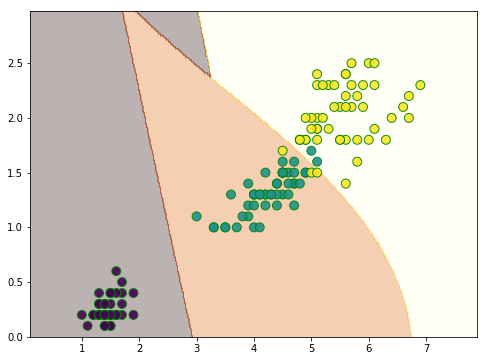

In [8]:
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=Y, s=80, 
            alpha=0.9, edgecolors='g');

# implementing 

In [9]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
Y = df['tmp']
X_train, X_std_test, Y_train, Y_test = train_test_split(X, Y,
                                                        train_size=0.8, 
                                                        random_state=0)

# Scale features

In [10]:
SC=StandardScaler()
X_standard_train=SC.fit_transform(X_train)

In [11]:
C=1.0
model_1=svm.SVC(kernel='poly',gamma='auto',C=C,degree=3)
model_1.fit(X_standard_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Accuracy for train data

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [13]:
score=cross_val_score(model_1,X_standard_train,Y_train,cv=3)

In [14]:
print("Average accuracy:{:.4f}".format(np.mean(score)))

Average accuracy:0.9500


In [15]:
print("standard deviation:{:.4f}".format(np.std(score)))

standard deviation:0.0540


In [16]:
y_train_pred=cross_val_predict(model,X_standard_train,Y_train,cv=3)

In [17]:
confusion_matrix(Y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [18]:
print("Precision Score: \t {0:.4f}".format(precision_score(Y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(Y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(Y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9570
Recall Score: 		 0.9500
F1 Score: 		 0.9500


# with test data

# RBF(RADIAL BASE FUNCTION)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=sns.load_dataset('iris')
col=['petal_length','petal_width']
X=df.loc[:,col]
num_to_species={
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
df['tmp']=df['species'].map(num_to_species)
Y=df['tmp']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

# Scale features

In [22]:
sc_x=StandardScaler()
X_sc_train=sc_x.fit_transform(X_train)

In [24]:
C=1.0
model_2=svm.SVC(kernel='rbf',gamma=0.7,C=C)
model_2.fit(X_sc_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
score=cross_val_score(model_2,X_sc_train,Y_train,cv=10,scoring='accuracy')
print("Average Accurcy:{:.4f}".format(np.mean(score)))
print("SD:{:.4f}".format(np.std(score)))

Average Accurcy:0.9500
SD:0.0553


In [28]:
y_train_pred=cross_val_predict(model_2,X_sc_train,Y_train,cv=10)

In [29]:
confusion_matrix(Y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [30]:
print("Precision Score: \t {0:.4f}".format(precision_score(Y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(Y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(Y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


# Grid Search

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline=Pipeline([('clf',svm.SVC(kernel='rbf',gamma=0.1,C=1))])
params={
    'model_2__C':(0.1, 0.5, 1, 2, 5, 10, 20),
    'model_2__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}
svm_rbf_grid=GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')
svm_rbf_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter model_2 for estimator Pipeline(memory=None,
         steps=[('clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [43]:
svm_rbf_grid.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [44]:
Y_train_pred=svm_rbf_grid.predict(X_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'